<a href="https://colab.research.google.com/github/lakshmi-durga05/bharatintern-task3-housepriceprediction/blob/main/housepriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
58/58 [==============================] - 1s 7ms/step - loss: 438926376960.0000 - val_loss: 1356660998144.0000
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 438558228480.0000 - val_loss: 1355688312832.0000
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 435981713408.0000 - val_loss: 1350625001472.0000
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 426346151936.0000 - val_loss: 1335297703936.0000
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 402470273024.0000 - val_loss: 1301272985600.0000
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 355676291072.0000 - val_loss: 1243871444992.0000
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 288072302592.0000 - val_loss: 1173167669248.0000
Epoch 8/100
58/58 [==============================] - 0s 3ms/step - loss: 214707847168.0000 - val_loss: 1110202384384.0000
Epoch 9/100
58/58 [=====

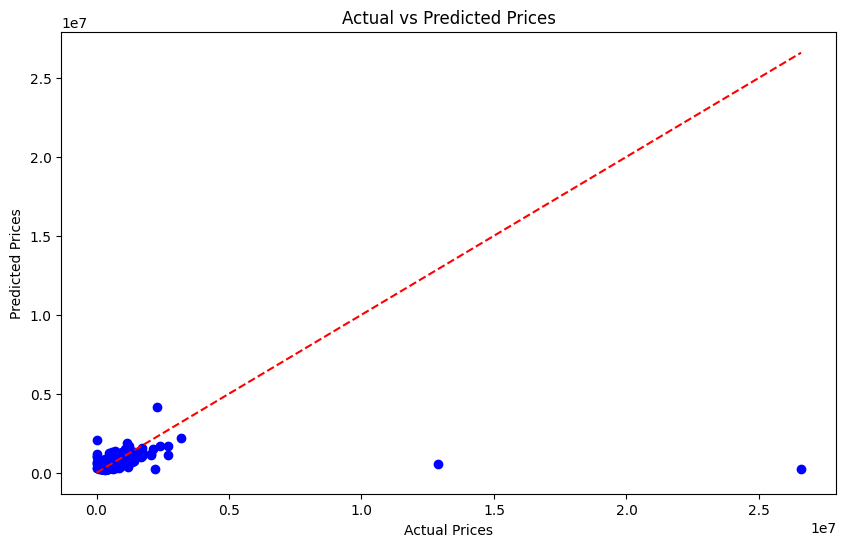

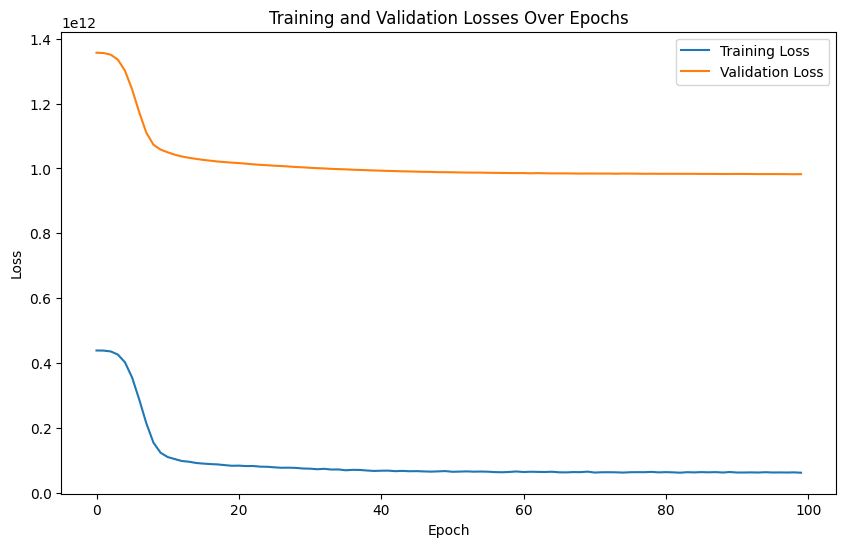

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorfhousepricepredictionlow as tf

# Step 1: Data Collection
data = pd.read_csv('/content/drive/MyDrive/data.csv')

# Step 2: Data Preprocessing
# Assuming data preprocessing steps are done here, including handling missing values, encoding categorical variables, etc.
# For simplicity, let's assume categorical variables are already encoded and missing values are handled.

# Step 3: Split Data into Training and Testing Sets
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Build the TensorFlow Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.2),  # Adding dropout for regularization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model with adjusted learning rate and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Step 6: Train the Model with increased number of epochs
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, verbose=1, validation_data=(X_test_scaled, y_test))

# Step 7: Evaluate the Model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

# Step 8: Plot the Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Step 9: Plot Training and Validation Losses Over Epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses Over Epochs')
plt.legend()
plt.show()

Mounted at /content/drive
